# Second test with a cutting aggregate

## 1) Loading of the data

In [3]:
import load_stl
import meshio
import os.path
import sys
import vtk
from vtk.util.numpy_support import vtk_to_numpy
import numpy as np
import basic_functions as bf
import test_image_ellipsoid as tie
import bounding_box as bbox
import plot
import included_ellipsoid as ie
import bounding_ellipsoid as be
import scipy as scipy
from scipy import optimize
from scipy.optimize import minimize
from importlib import reload

Production of the .vtk file

In [2]:
load_stl.load_aggregate('\\Users\\DFSCHMIDT\\Documents\\Python_Scripts\\PJ1_roi#1_aggregate1_stlascii.stl')

Number of points: 359408
Number of elements:
  triangle: 718812

Conversion of the produced .vtk files to an np.array   
**Recentering of the aggregate coordinates**

In [4]:
reader = vtk.vtkGenericDataObjectReader()
reader.SetFileName('PJ1_roi#1_aggregate1_stlascii.vtk')
reader.Update()

aggregate_coord = np.array(reader.GetOutput().GetPoints().GetData())
print(aggregate_coord)
aggregate_coord = aggregate_coord - bf.compute_center(aggregate_coord)

[[18.706585 17.56197  14.205466]
 [18.693296 17.572308 14.205466]
 [18.706585 17.572308 14.202589]
 ...
 [16.906143 17.986408 19.336992]
 [16.924149 17.986408 19.337343]
 [16.942152 17.986408 19.33699 ]]


In [9]:
print(aggregate_coord.shape)

(359408, 3)


## 2) Aggregate Plot

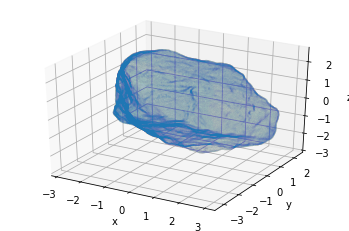

In [5]:
plot.scatter_plot(aggregate_coord)

## 3) Bounding box

Nelder-Mead algorithm

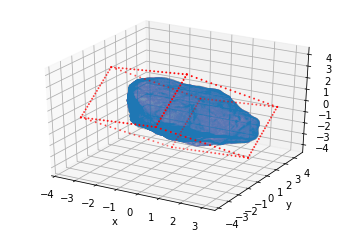

In [10]:
reload(plot)
bbox_aggregate = bbox.bbox_optim(aggregate_coord)
plot.bbox_plot(aggregate_coord, bbox_aggregate)

In [7]:
print(bbox_aggregate)

{'angles': array([0.78982553, 0.4354449 ]), 'volume': 115.55296375226389}


## 4) Bounding ellipsoid

In [35]:
reload(be)

<module 'bounding_ellipsoid' from 'C:\\Users\\DFSCHMIDT\\Documents\\Python_Scripts\\bounding_ellipsoid.py'>

In [11]:
bounding_ellipsoid = be.bounding_ellipsoid_optim(aggregate_coord)

In [34]:
print(bounding_ellipsoid)

{'volume': 133.48877214467055, 'a': 3.0593521022112915, 'b': 2.7189183698811714, 'c': 3.831161829328206, 'bbox': {'angles': array([0.78982553, 0.4354449 ]), 'volume': 115.55296375226389}}


Plot of the bounding ellipsoid with different points of view

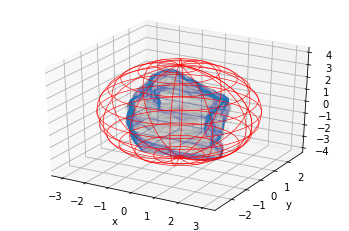

In [12]:
rotated_aggregate = bf.rotate_aggregate(aggregate_coord,
                                        angles=bounding_ellipsoid['bbox']['angles'])
ax = plot.fit_ellipsoid_plot(rotated_aggregate, bounding_ellipsoid)

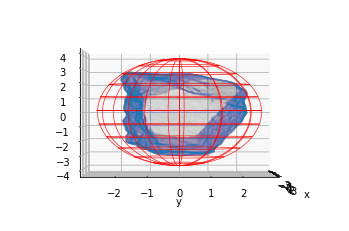

In [13]:
reload(plot)
rotated_aggregate = bf.rotate_aggregate(aggregate_coord,
                                        angles=bounding_ellipsoid['bbox']['angles'])
ax = plot.fit_ellipsoid_plot(rotated_aggregate, bounding_ellipsoid)

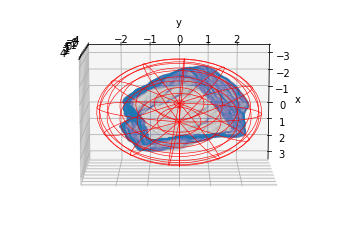

In [14]:
reload(plot)
rotated_aggregate = bf.rotate_aggregate(aggregate_coord,
                                        angles=bounding_ellipsoid['bbox']['angles'])
ax = plot.fit_ellipsoid_plot(rotated_aggregate, bounding_ellipsoid)

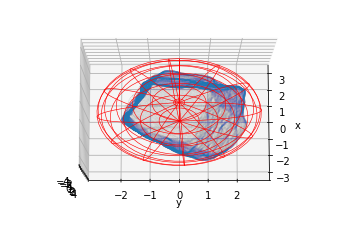

In [22]:
reload(plot)
rotated_aggregate = bf.rotate_aggregate(aggregate_coord,
                                        angles=bounding_ellipsoid['bbox']['angles'])
ax = plot.fit_ellipsoid_plot(rotated_aggregate, bounding_ellipsoid)

## 4) Included ellipsoid

In [16]:
included_ellipsoid = ie.included_ellipsoid_optim(aggregate_coord, 1e-3)

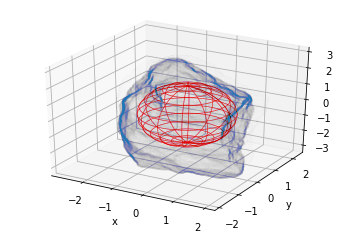

In [18]:
reload(plot)
rotated_aggregate = bf.rotate_aggregate(aggregate_coord,
                                        angles=included_ellipsoid['bbox']['angles'])
ax = plot.fit_ellipsoid_plot(rotated_aggregate, included_ellipsoid)

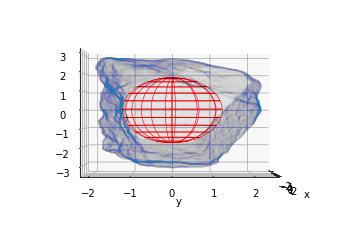

In [19]:
reload(plot)
rotated_aggregate = bf.rotate_aggregate(aggregate_coord,
                                        angles=included_ellipsoid['bbox']['angles'])
ax = plot.fit_ellipsoid_plot(rotated_aggregate, included_ellipsoid)

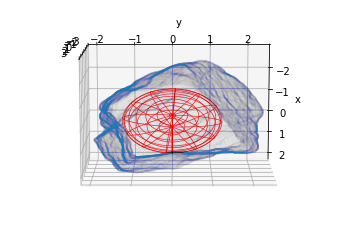

In [20]:
reload(plot)
rotated_aggregate = bf.rotate_aggregate(aggregate_coord,
                                        angles=included_ellipsoid['bbox']['angles'])
ax = plot.fit_ellipsoid_plot(rotated_aggregate, included_ellipsoid)

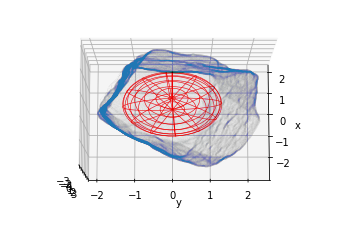

In [21]:
reload(plot)
rotated_aggregate = bf.rotate_aggregate(aggregate_coord,
                                        angles=included_ellipsoid['bbox']['angles'])
ax = plot.fit_ellipsoid_plot(rotated_aggregate, included_ellipsoid)